## Diabetes Diagnosis Dataset

This dataset contains 9,538 medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk. The data is structured with realistic distributions, making it valuable for medical research, statistical analysis, and machine learning applications.

Age: The age of the individual (18-90 years).

Pregnancies: Number of times the patient has been pregnant.

BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).

Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.

BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.

HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.

LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).

HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).

Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.

WaistCircumference: Waist measurement (cm), an indicator of central obesity.

HipCircumference: Hip measurement (cm), used to calculate WHR.

WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.

FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).

DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).

Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).

MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).

Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

This dataset is useful for exploring the relationships between lifestyle choices, genetic factors, and diabetes risk, providing valuable insights for predictive modeling and health analytics.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
df = pd.read_csv('diabetes_dataset.csv')
df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [62]:
df.tail()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1
9537,33,3,25.61,69.1,65.0,4.0,69.0,59.4,169.5,79.7,101.1,0.79,0,1,0,0,0


In [64]:
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


## Visualising the data

In [67]:
df['Outcome'].unique()

array([0, 1], dtype=int64)

In [69]:
df['Outcome'].value_counts()

Outcome
0    6256
1    3282
Name: count, dtype: int64

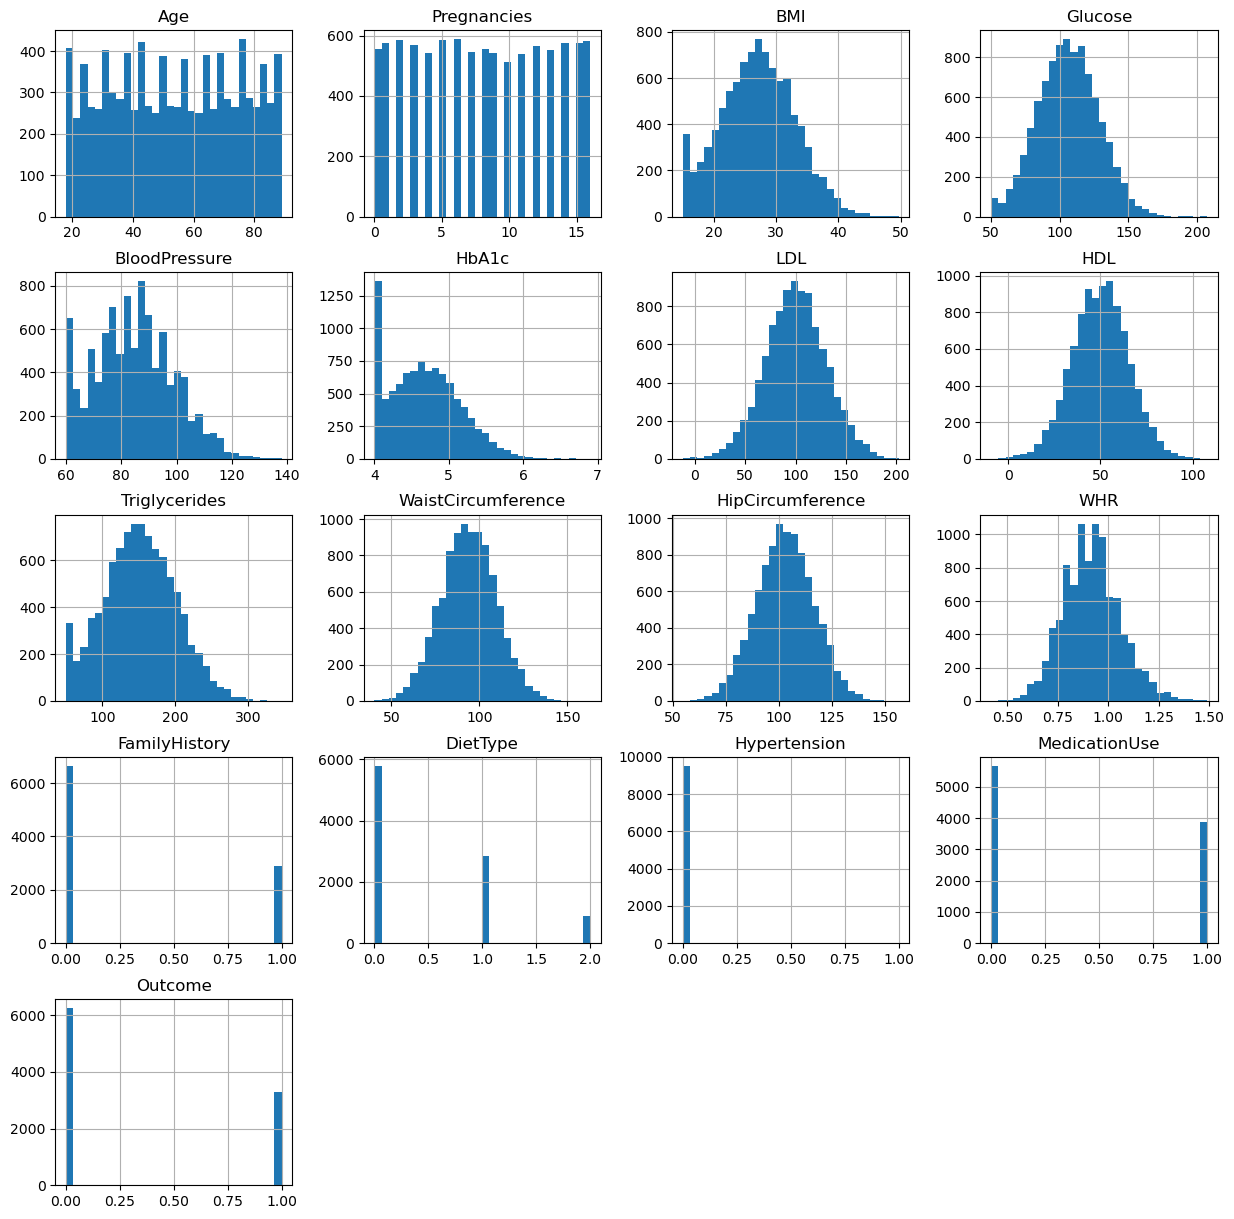

In [71]:
df.hist(bins=30, figsize=(15, 15));

## Plotting BMI distribution

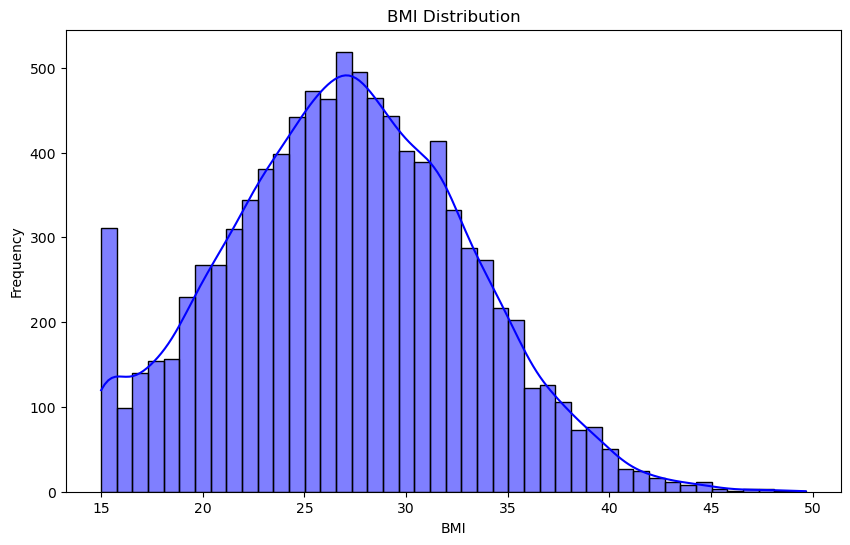

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## Ploting Age vs Glucose levels 

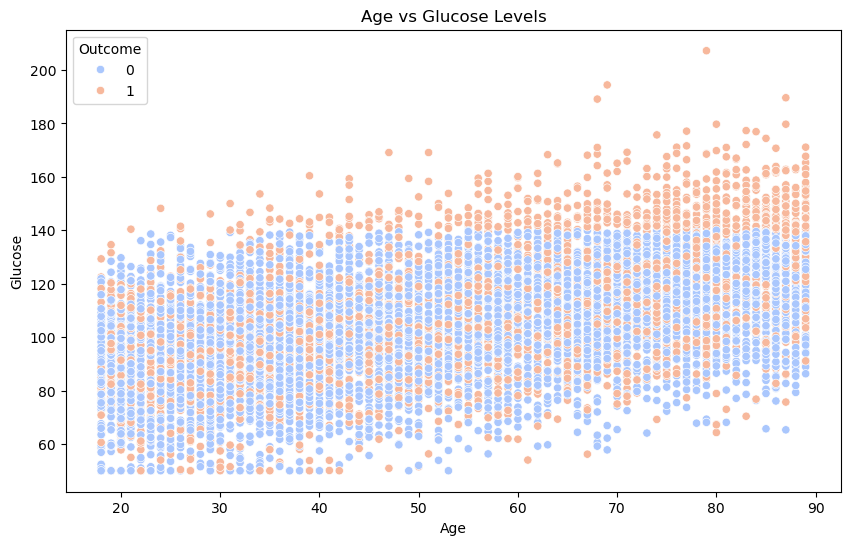

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', data=df, hue='Outcome', palette='coolwarm')
plt.title('Age vs Glucose Levels')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

## Now we will plot the heat map to find which of the factors affects the output columnn the most and what other factors contribute to it.

<Axes: >

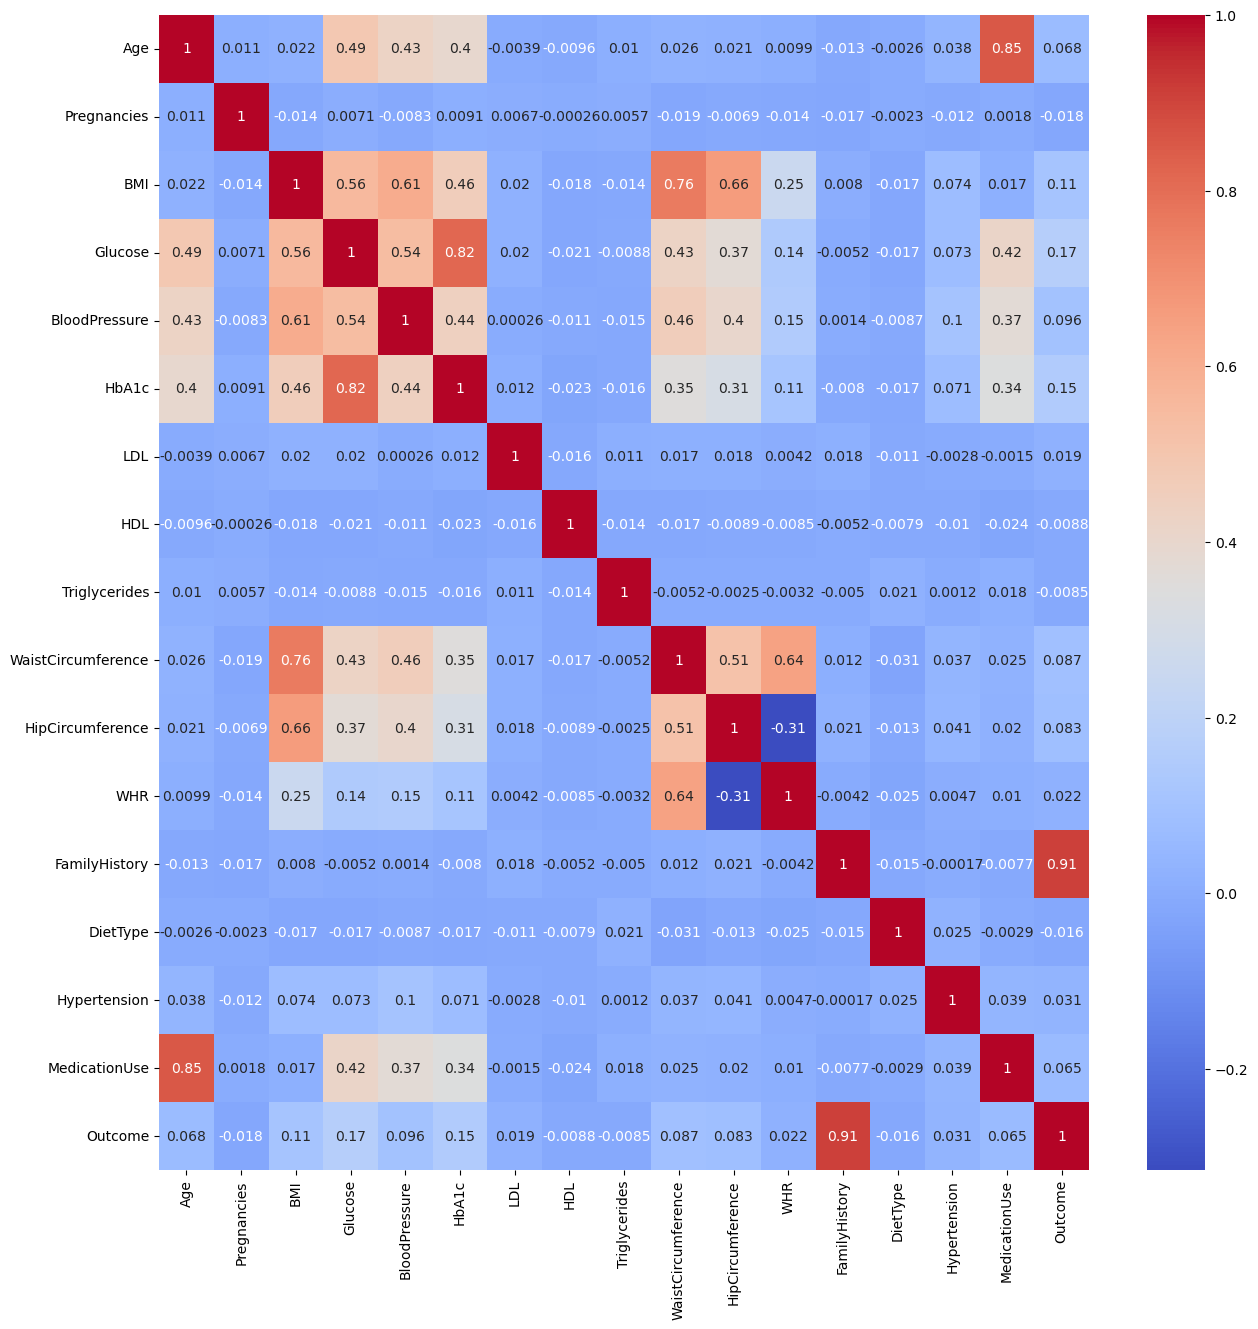

In [127]:
fig, ax = plt.subplots(figsize=(15,15))      
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm',ax = ax)

# Here we see a very strong relation between familyhistory of having diabetes vs outcome column 

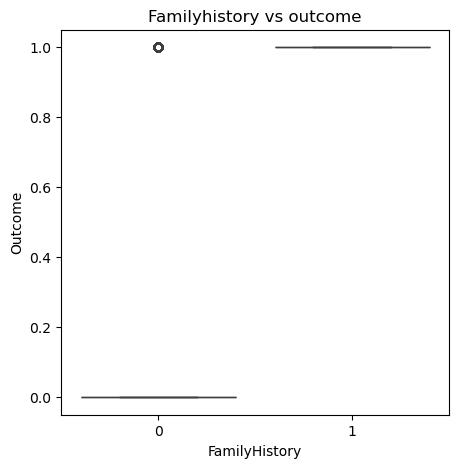

In [77]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['FamilyHistory'], y=df['Outcome'])
plt.title("Familyhistory vs outcome")
plt.show()

# From the heat map we see following outbreaks:
* BMI(0.11) , HbAlc(0.15) and glucose(0.17) are slightly related to the outcome column.
* FamilyHistory affects the outcome column the most.

In [81]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

# Using Scaler to make out data more feasible and clean.
* StandardScaler helps our models to score more accuracy.

In [86]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model training 

## 1. Logistric Regression

In [90]:
l = LogisticRegression() 
l.fit(scaled_X_train, y_train)

l_p = l.predict(scaled_X_test)

print(classification_report(y_test, l_p))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1561
           1       1.00      0.99      0.99       824

    accuracy                           1.00      2385
   macro avg       1.00      0.99      0.99      2385
weighted avg       1.00      1.00      1.00      2385



In [94]:
acc = accuracy_score(y_test, l_p)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


## Accuracy from Logistic Regression : 100%

## 2. SVC

In [99]:
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)
svc_pred = svc_model.predict(scaled_X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1561
           1       1.00      0.98      0.99       824

    accuracy                           0.99      2385
   macro avg       0.99      0.99      0.99      2385
weighted avg       0.99      0.99      0.99      2385



In [103]:
acc = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.99


# Accuracy from SVC : 99%

## 3. KNN : First training for diffrent numbers than selecting the best result number. 

In [110]:
num_neighbors = range(1, 15)
for n in num_neighbors:
    test_knn = KNeighborsClassifier(n_neighbors = n)
    test_knn.fit(scaled_X_train, y_train)
    test_knn_pred = test_knn.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, test_knn_pred)
    print(f"Num : {n} accuracy : {accuracy} ")

Num : 1 accuracy : 0.9689727463312369 
Num : 2 accuracy : 0.9681341719077569 
Num : 3 accuracy : 0.9735849056603774 
Num : 4 accuracy : 0.9735849056603774 
Num : 5 accuracy : 0.9752620545073375 
Num : 6 accuracy : 0.9714884696016771 
Num : 7 accuracy : 0.9731656184486374 
Num : 8 accuracy : 0.9727463312368972 
Num : 9 accuracy : 0.9735849056603774 
Num : 10 accuracy : 0.9719077568134172 
Num : 11 accuracy : 0.9731656184486374 
Num : 12 accuracy : 0.9727463312368972 
Num : 13 accuracy : 0.9731656184486374 
Num : 14 accuracy : 0.9735849056603774 


# Hence here we can see the model have best accuracy of 97% as we increase k its getting constant at it

In [113]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(scaled_X_train, y_train)

knn_pred = knn.predict(scaled_X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1561
           1       1.00      0.93      0.96       824

    accuracy                           0.97      2385
   macro avg       0.98      0.96      0.97      2385
weighted avg       0.98      0.97      0.97      2385



## 4. Random Forest 

In [116]:
rd_frst = RandomForestClassifier(n_estimators=100, random_state=42)
rd_frst.fit(X_train, y_train)
rd_pred = rd_frst.predict(X_test)
print(classification_report(y_test, rd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1561
           1       1.00      1.00      1.00       824

    accuracy                           1.00      2385
   macro avg       1.00      1.00      1.00      2385
weighted avg       1.00      1.00      1.00      2385



## Accuracy from RandomForest is 100%

## From out model training Random Forest and Logistic Regression stand out to be the best models here 